<a href="https://colab.research.google.com/github/LilLsd/Unidad1/blob/main/segmentacion_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de datos

La empresa automotriz Autos Jiquilpan tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Después de una investigación de mercado intensiva, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron una comunicación y un acercamiento segmentados para diferentes segmentos de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia en nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Se le pide que ayude al gerente a predecir el grupo correcto de nuevos clientes.

### <font color=red> NOTA: </font><font color=blue>  Explique lo que está realizando y de sus conclusiones sobre los resultados </font>


## Contenido del datset:

ID   ID único <br>
Gender Género <br>
Ever_Married Estado civil del cliente <br>
Age Edad del cliente <br>
Graduated Es graduado? <br>
Profession Profesión <br>
Work_Experience Experiencia laboral en años <br>
Spending_Score Gasto del cliente <br>
Family_Size Tamaño de familia incluido el cliente<br>
Var_1 Categoria del cliente (éste desconoce en que categoria está)<br>
<br><br>




## 1. Vista rápida al dataset


In [24]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/gdrive')
import numpy as np

#leer mi dataset
df = pd.read_csv('/gdrive/MyDrive/Maching lerning/Maching Lerning/(Unidad 1)/Pandas/Practicas_clase_tech/dataset_clientes.csv')
df.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


## 2. Datos duplicados

In [45]:
# Lo primero que hare es visualizar todos los datos que esten duplicados
# Filtrar filas duplicadas (incluyendo la primera aparición)
duplicados = df[df.duplicated(keep=False)]

# Mostrar duplicados
print(duplicados)

# al parecer este dataset no contiene datos duplicados

Empty DataFrame
Columns: [ID, Gender, Ever_Married, Age, Graduated, Profession, Work_Experience, Spending_Score, Family_Size, Var_1]
Index: []


## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [46]:
# voy a mostrar los datos del dataset que esten nulos por columas
df.isnull().sum()


,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [47]:
#voy a mostrar todos los valores nulos por filas
df[df.isnull().any(axis=1)]


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1


In [42]:
#Estrategia para implementar la correccion de esos datos nulos sin eliminarlos
#la estrategia que voy a implementar es rellenar los campos con un valor desconocido
columnas_categoricas = ["Ever_Married", "Graduated", "Profession", "Var_1"]
df[columnas_categoricas] = df[columnas_categoricas].fillna("Desconocido")


# 2. Rellenar valores nulos en columnas numéricas con la mediana
numerical_columns = ["Work_Experience", "Family_Size"]
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# voy verificar si aún hay valores nulos
print(df.isnull().sum())





ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


## 4. Verifique outlaiers de cada columnas

Outliers en la columna numérica 'ID':
Empty DataFrame
Columns: [ID, Gender, Ever_Married, Age, Graduated, Profession, Work_Experience, Spending_Score, Family_Size, Var_1]
Index: []


Outliers en la columna numérica 'Age':
          ID  Gender Ever_Married  Age Graduated Profession  Work_Experience  \
19    459045  Female          Yes   88       Yes     Lawyer              1.0   
30    459080    Male          Yes   89        No     Lawyer              1.0   
67    459194  Female          Yes   89       Yes     Lawyer              0.0   
109   459344  Female          Yes   88       Yes     Artist              1.0   
137   459410  Female          Yes   88       Yes     Lawyer              1.0   
191   459576  Female          Yes   88        No     Lawyer              1.0   
218   459665    Male          Yes   88       Yes     Artist              4.0   
390   460272  Female           No   88       Yes     Lawyer              0.0   
452   460447    Male  Desconocido   89        No     Lawye

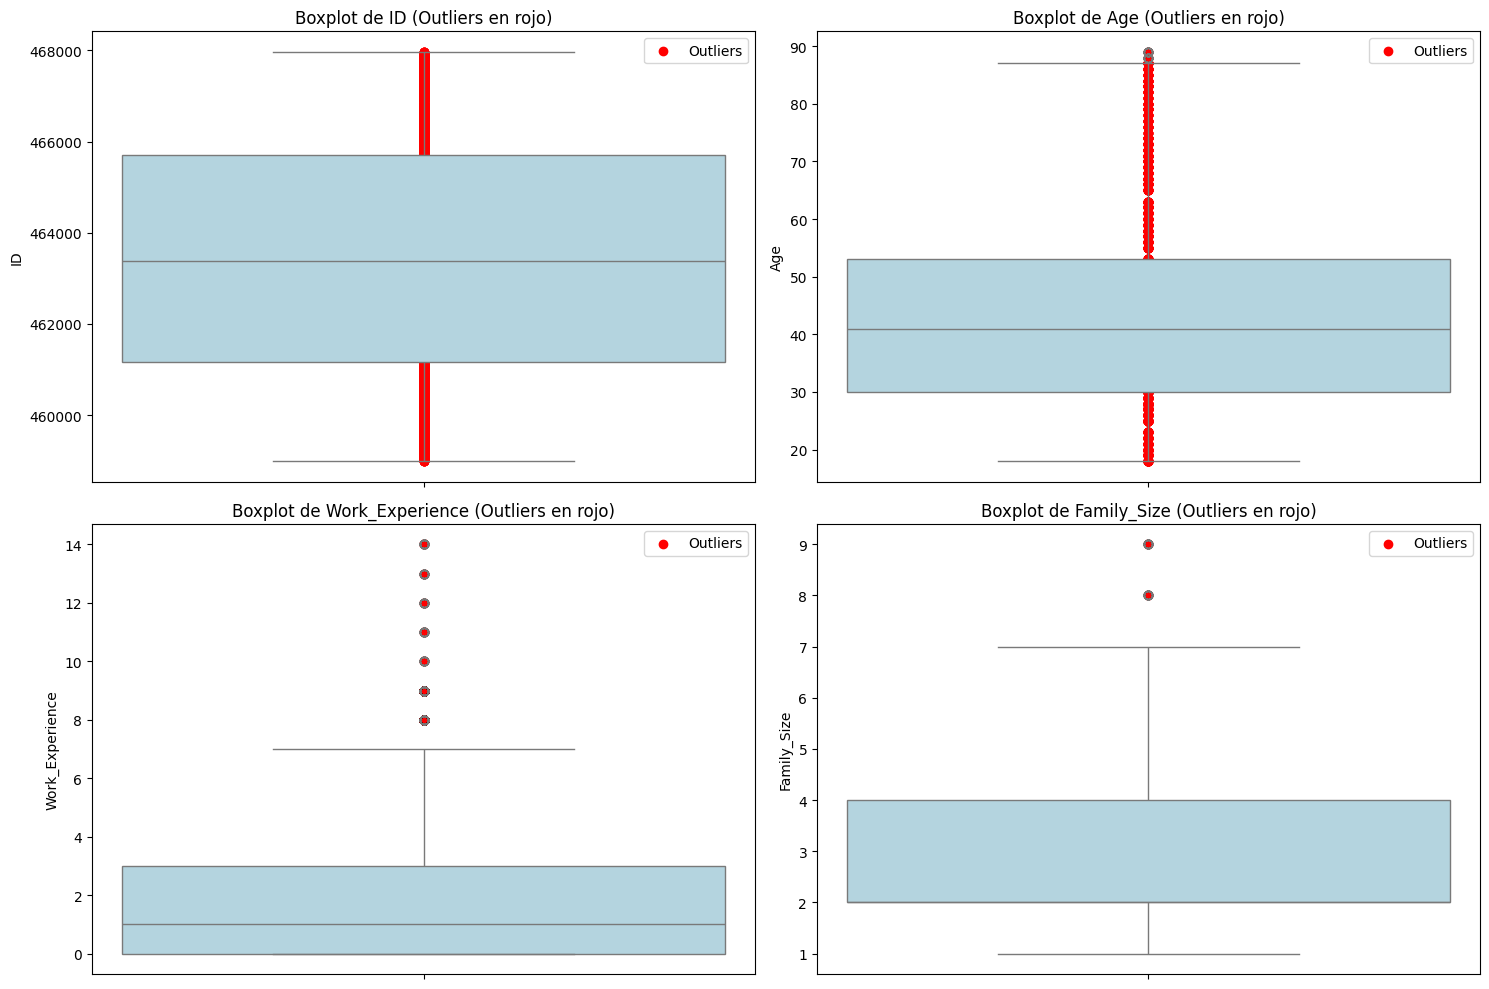

<ipython-input-48-fe23c7fdcc02>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
<ipython-input-48-fe23c7fdcc02>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
<ipython-input-48-fe23c7fdcc02>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
<ipython-input-48-fe23c7fdcc02>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

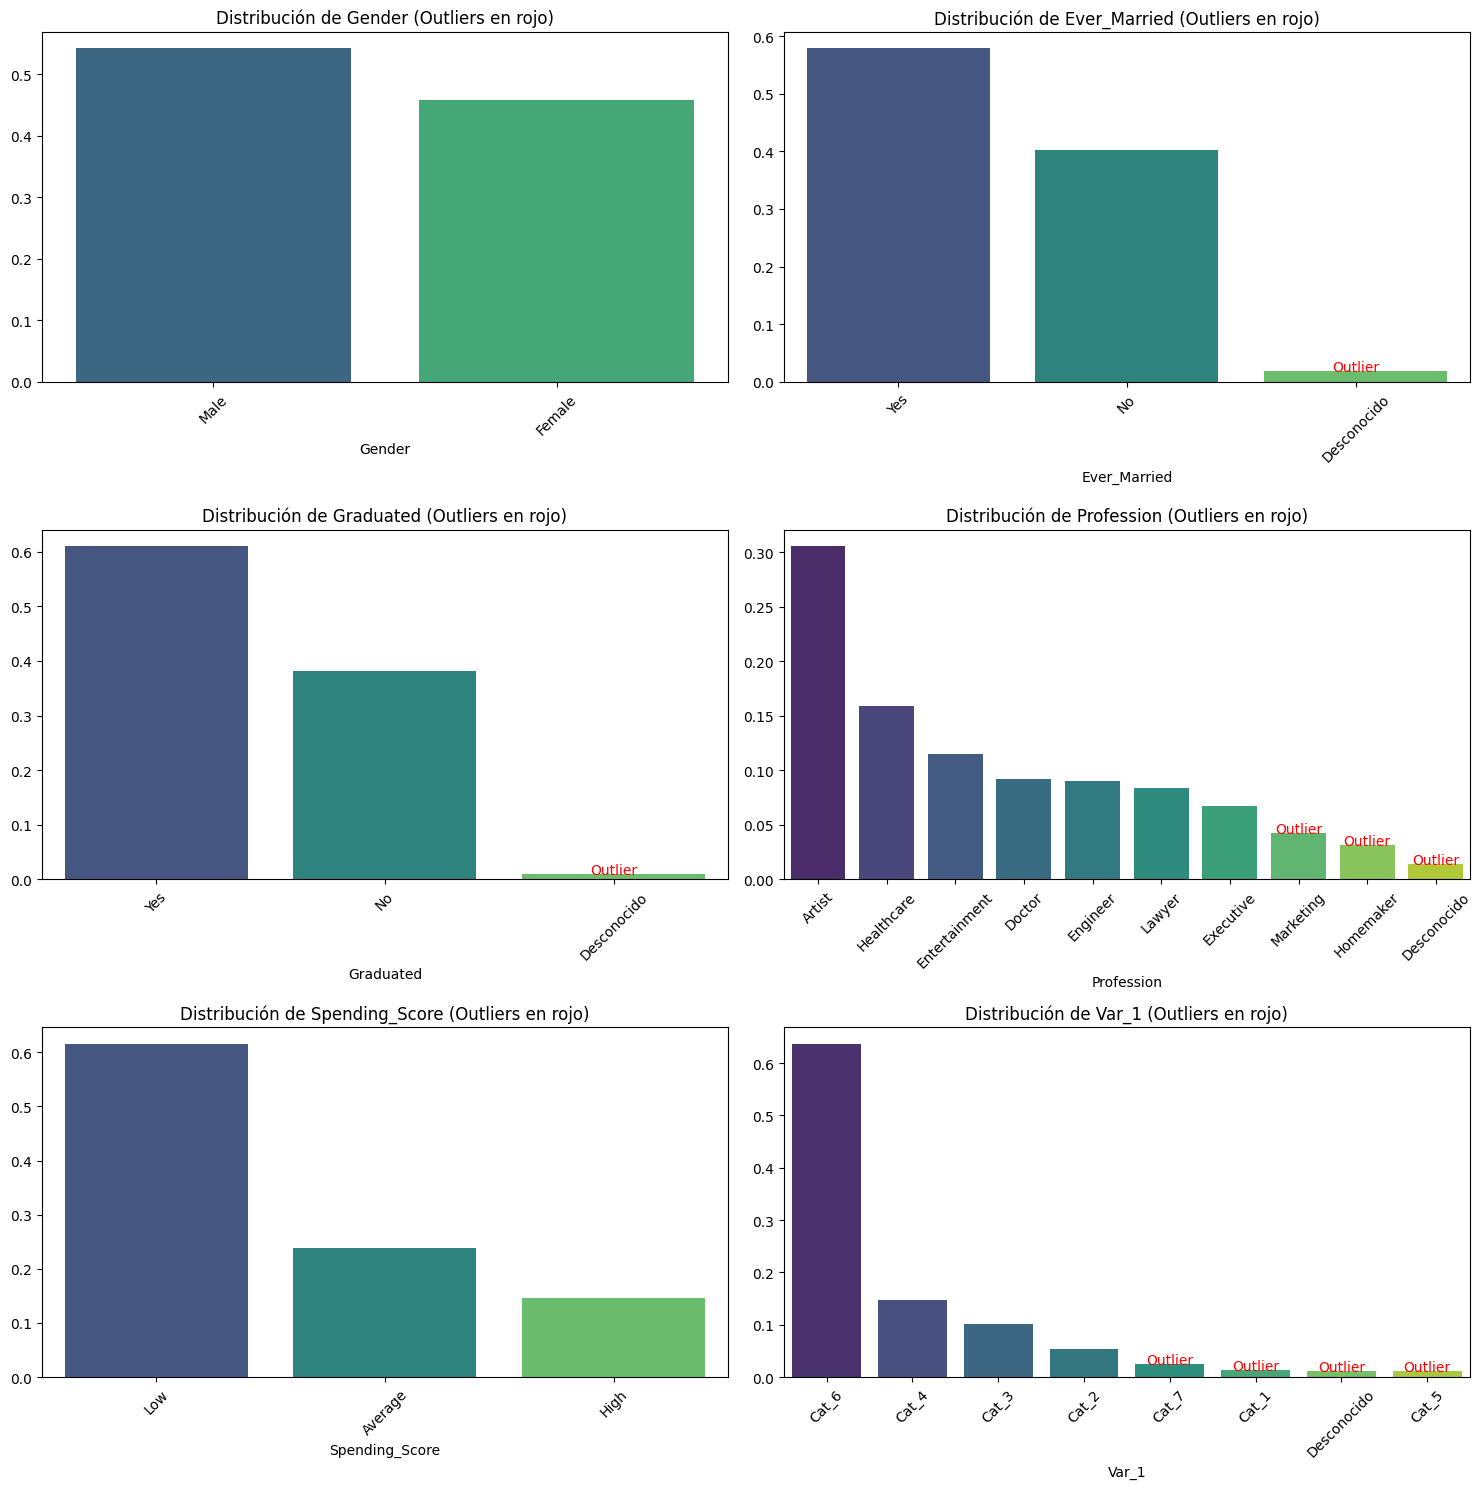

In [48]:

# Función para detectar y visualizar outliers en todo el dataset
def analizar_y_visualizar_outliers(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers en la columna numérica '{column}':")
        print(outliers)
        print("\n" + "="*50 + "\n")

    # Detectar outliers en columnas categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        value_counts = df[column].value_counts(normalize=True)
        outliers = value_counts[value_counts < 0.05]  # Umbral del 5%
        print(f"Outliers en la columna categórica '{column}':")
        print(outliers)
        print("\n" + "="*50 + "\n")

    # Visualización de columnas numéricas (boxplots)
    num_numeric = len(numeric_columns)
    rows = (num_numeric // 2) + (num_numeric % 2)
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(rows, 2, i)
        sns.boxplot(y=df[column], color='lightblue')
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        plt.scatter(x=[0] * len(outliers), y=outliers[column], color='red', label='Outliers')
        plt.title(f'Boxplot de {column} (Outliers en rojo)')
        plt.legend()
    plt.tight_layout()
    plt.show()

    # Visualización de columnas categóricas (gráficos de barras)
    num_categorical = len(categorical_columns)
    rows = (num_categorical // 2) + (num_categorical % 2)
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(rows, 2, i)
        value_counts = df[column].value_counts(normalize=True)
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        outliers = value_counts[value_counts < 0.05]
        for category in outliers.index:
            plt.text(x=list(value_counts.index).index(category), y=outliers[category], s='Outlier', color='red', ha='center')
        plt.title(f'Distribución de {column} (Outliers en rojo)')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Llamar a la función para analizar y visualizar outliers
analizar_y_visualizar_outliers(df)

## 4.1 Datos numéricos

{'ID': 0, 'Age': 19, 'Work_Experience': 58, 'Family_Size': 31}


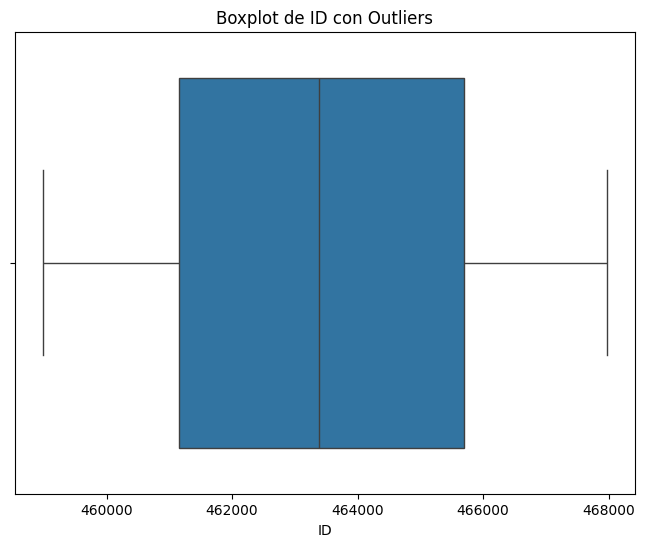

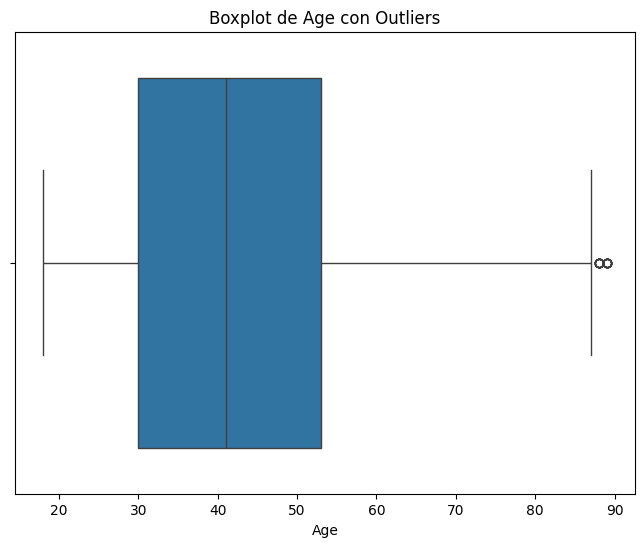

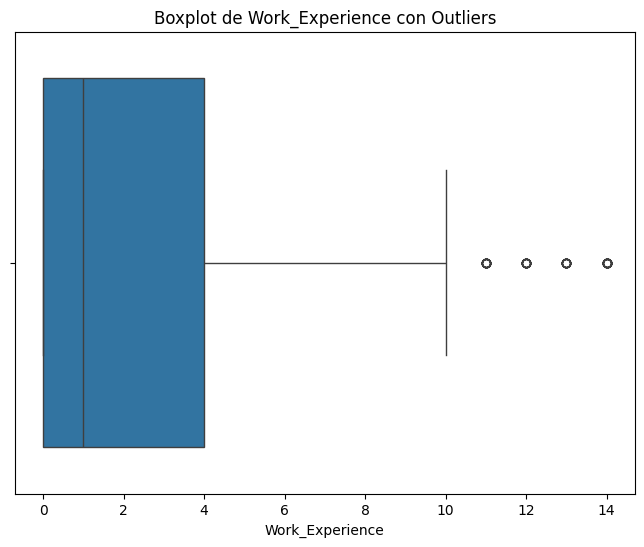

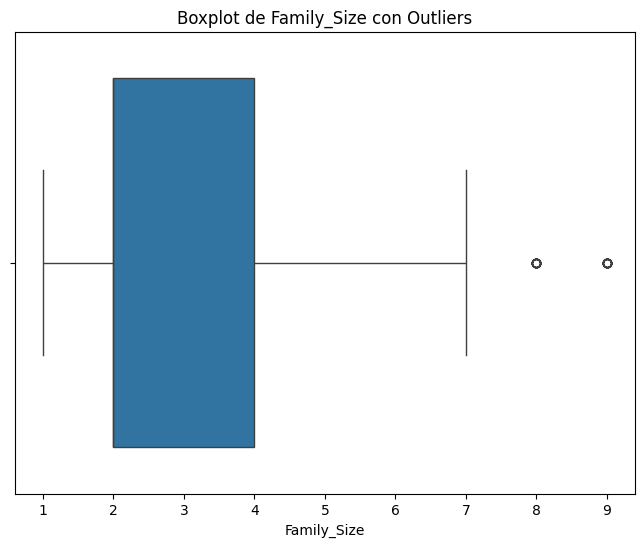

In [29]:
# Función para detectar outliers usando el método IQR
def detectar_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        Q1 = df[col].quantile(0.25)  # Primer cuartil (Q1)
        Q3 = df[col].quantile(0.75)  # Tercer cuartil (Q3)
        IQR = Q3 - Q1  # Rango intercuartil (IQR)
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar outliers
        outliers[col] = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]

    return outliers

# Seleccionar columnas numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Detectar outliers
outliers_detectados = detectar_outliers_iqr(df, numerical_columns)

# Contar la cantidad de outliers por columna
outliers_cantidad = {col: len(valores) for col, valores in outliers_detectados.items()}
print(outliers_cantidad)

# Graficar los boxplots para cada columna con outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col} con Outliers")
    plt.show()


## 4.2 Datos categóricos

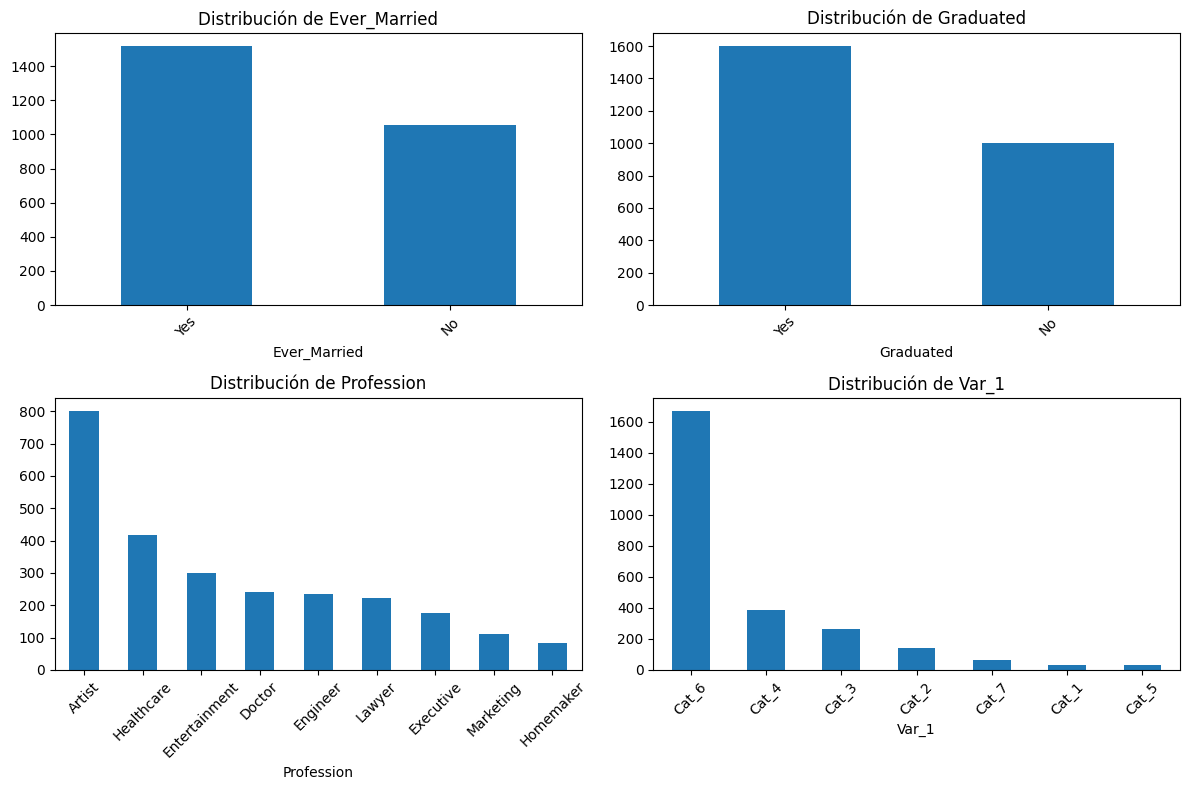

In [33]:
# Crear gráficos de barras para cada columna categórica
plt.figure(figsize=(12, 8))
for i, column in enumerate(columnas_categoricas, 1):
    plt.subplot(2, 2, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Guarde el dateset limpio

In [50]:
#guardar el dataset limpio
df= pd.DataFrame(df)
df.to_csv('/gdrive/MyDrive/Maching lerning/Maching Lerning/(Unidad 1)/Pandas/Practicas_clase_tech/dataset_clientes_limpio.csv', index=False)